In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# INWARD REMITTANCES (receiving, incoming)

In [3]:
inrem = pd.read_excel('inward_remit.xlsx')
inrem.sample(5)

,Migrant remittance inflows (US$ million),1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2013,2014,2015,2016,2017,2018,2019,2020,2021e,Remittances as a share of GDP in 2021e (%)
220,"For additional information, please also see ""I...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,Costa Rica,4.1,2.4,5.6,5.3,6.4,7.2,7.700000,7.900000,9.100000,...,596.399211,593.925384,551.988508,545.423773,560.366619,533.509663,553.377977,524.786748,631.855746,1.028076
100,Kiribati,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.254065,16.381031,14.048045,16.294960,17.959541,19.978147,20.075191,16.902361,19.1329,8.24694
181,St. Vincent and the Grenadines,NaN,NaN,NaN,NaN,NaN,NaN,13.888889,15.111111,14.962963,...,31.587707,43.600000,41.789925,44.897122,45.689508,46.770932,0.000000,0.000000,0,0
51,Czech Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1737.884337,2628.261738,2674.828099,3126.388080,3585.217057,3935.990609,3859.937090,4184.383610,4373.984,1.579546


In [309]:
inrem = inrem[:216]
inrem = inrem[:216]
inrem = inrem.dropna(how='all')
inrem0 = inrem.replace(np.nan, 0)
inrem0 = inrem0.rename(columns={"Migrant remittance inflows (US$ million)": "inflow_country", "Remittances as a share of GDP in 2021e (%)": "remit_gdp"}).set_index('inflow_country').replace(' ', np.nan)
# rename country column, rename %GDP column, set country column as index, replace empty value with Nan
inrem0['total_rem'] = inrem0.sum(axis=1)
# add column for aggregate remittances

In [310]:
inrem0.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021e,remit_gdp,total_rem
inflow_country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.367822,348.624717,627.710802,822.731630,803.546454,828.571904,788.917115,627.710802,3.117356,6458.398367
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1421.007454,1290.863508,1306.009167,1311.822432,1458.210056,1472.812242,1465.987212,1600.000000,9.540847,31937.846673
Algeria,406.0,447.0,507.0,392.0,329.0,313.0,358.0,487.0,379.0,345.0,...,2452.442617,1997.393458,1989.023597,1791.887073,1984.998399,1785.838683,1699.608935,1759.095247,1.073850,21545.679823
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Countries RECEIVING the most remittances

In [312]:
inrem_countries = inrem0.sort_values('total_rem', ascending=False)[2:]
inrem_countries = inrem_countries.drop('remit_gdp', axis=1).drop('total_rem', axis=1)
inrem_countries.head(5)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021e
inflow_country,,,,,,,,,,,,,,,,,,,,,
India,2761.280685,2301.890115,2621.913836,2662.479622,2293.065837,2472.285487,2243.01388,2663.469748,2316.724191,2609.857302,...,68820.517838,69970.360847,70388.642797,68909.693353,62744.364090,68967.175500,78790.170929,83332.078002,83149.172934,87000.000000
China,0.000000,0.000000,616.000000,542.000000,403.000000,271.000000,407.00000,166.000000,129.000000,76.000000,...,57986.598422,59491.287194,62332.342308,63937.646592,60999.999488,63875.674112,67413.592064,68398.475114,59506.673349,53000.000000
Mexico,1039.000000,1220.000000,1226.000000,1391.000000,1564.000000,1619.000000,1771.00000,1987.000000,2442.000000,2790.000000,...,23208.649190,23188.811955,24802.081325,26233.171803,28690.957406,32270.507679,35768.416627,39021.789685,42878.274907,52742.962524
Philippines,626.000000,800.000000,1049.000000,1124.000000,718.000000,806.000000,861.00000,1020.000000,1262.000000,1360.000000,...,24609.679613,26716.840269,28690.797896,29799.395700,31141.973475,32809.770434,33808.967986,35167.471832,34913.342999,36240.000000
France,1441.000000,1279.000000,1342.000000,1279.000000,1262.000000,1391.000000,2022.00000,2469.000000,3424.000000,3221.000000,...,22666.366759,24412.282153,25358.374728,24066.989837,24042.348847,24884.547856,26878.780498,26173.645645,25141.879667,27161.082269


In [390]:
print('Top 10 inrem countries are:', (inrem_countries.index[:10]))

Top 10 inrem countries are: Index(['India', 'China', 'Mexico', 'Philippines', 'France', 'Egypt, Arab Rep.',
       'Nigeria', 'Germany', 'Pakistan', 'Bangladesh'],
      dtype='object', name='inflow_country')


[<AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>]

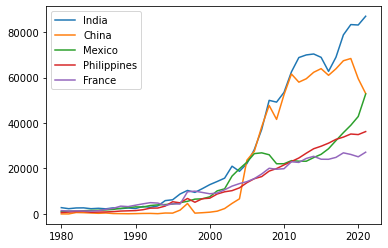

In [59]:
top5 = [
inrem_countries.iloc[0].plot(),
inrem_countries.iloc[1].plot(),
inrem_countries.iloc[2].plot(),
inrem_countries.iloc[3].plot(),
inrem_countries.iloc[4].plot()
]
plt.legend(loc='upper left')
top5

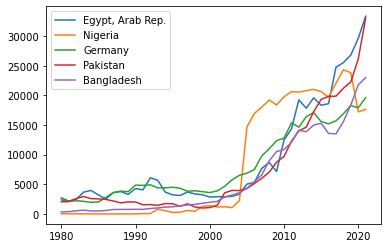

In [51]:
top10 = [
inrem_countries.iloc[5].plot(),
inrem_countries.iloc[6].plot(),
inrem_countries.iloc[7].plot(),
inrem_countries.iloc[8].plot(),
inrem_countries.iloc[9].plot()]
plt.legend(loc='upper left')

In [406]:
top15 = [inrem_countries.iloc[10].plot(),
inrem_countries.iloc[11].plot(),
inrem_countries.iloc[12].plot(),
inrem_countries.iloc[13].plot(),
inrem_countries.iloc[14].plot()]
plt.legend(loc='best')
plt.close()    # close fig

In [405]:
for i in range(25):
    inrem_countries.iloc[i].plot()
plt.close()    # close fig

<AxesSubplot:xlabel='inflow_country'>

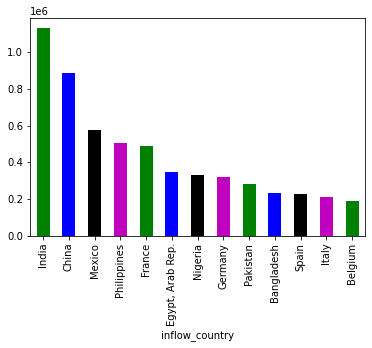

In [113]:
inrem0.sort_values('total_rem', ascending=False).total_rem[2:15].plot(kind='bar', color=['g','b','k','m'])

In [404]:
inrem1 = inrem0.sort_values('total_rem', ascending=False)
inrem1 = inrem1[2:]
inrem1['total_rem'].plot(x='inflow_country', y='total_rem', kind='bar')
plt.close()    # close fig

# Percent of GDP from Remittances (top 10)

(0.0, 1.0)

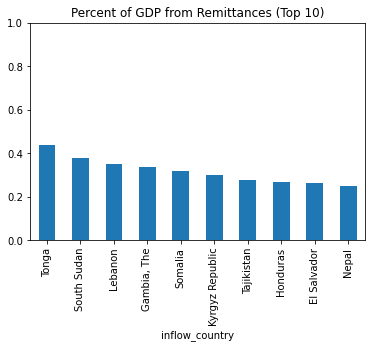

In [473]:
pd.to_numeric(inrem1.remit_gdp)
inrem1 = inrem1.sort_values('remit_gdp', ascending=False)
inrem1['pct_gdp'] = inrem1.remit_gdp / 100
inrem1.pct_gdp.head(10).plot(kind='bar',title='Percent of GDP from Remittances (Top 10)').set_ylim(0,1)

In [475]:
foo = inrem0.sort_values('remit_gdp', ascending=False).head(10)
foo = pd.DataFrame(foo.loc[:,'remit_gdp'])
foo = foo.reset_index()    # creating clean x and y columns
foo

,inflow_country,remit_gdp
0,Tonga,43.924772
1,South Sudan,37.879252
2,Lebanon,34.789036
3,"Gambia, The",33.751224
4,Somalia,31.987463
5,Kyrgyz Republic,30.061350
6,Tajikistan,27.764067
7,Honduras,26.590693
8,El Salvador,26.249955
9,Nepal,24.806654


In [477]:
foo.plot(x='inflow_country', y='remit_gdp', kind='area')
plt.close()    # close fig

<AxesSubplot:xlabel='inflow_country'>

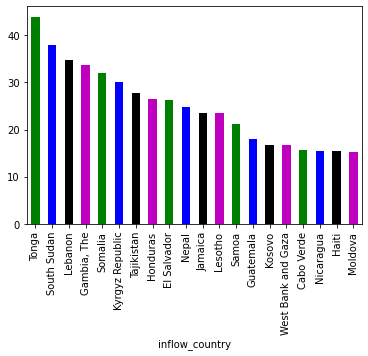

In [476]:
inrem1.sort_values('remit_gdp', ascending=False).remit_gdp[:20].plot(kind='bar', color=['g','b','k','m'])

# OUTWARD REMITTANCES (sending, outgoing)

In [204]:
outrem = pd.read_excel('outward_remit.xlsx')
outrem.sample(10)
outrem = outrem[:215]
outrem = outrem.dropna(how='all')
outrem0 = outrem.replace(np.nan, 0)
outrem0['total_rem'] = outrem0.sum(axis=1)
outrem0.sample(5)

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_41944/158692972.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  outrem0['total_rem'] = outrem0.sum(axis=1)


,Outward remittance flows (US$ million),1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,total_rem
46,Cote d'Ivoire,786.522678,504.20026,399.520836,328.922338,298.781092,286.790538,431.620193,513.644052,528.436883,...,694.444946,736.281654,746.866786,649.769213,715.984964,847.275831,919.027301,908.280382,0.000000,20278.523170
7,Argentina,36.000000,27.00000,18.000000,19.000000,22.000000,18.000000,20.000000,21.000000,0.000000,...,979.205922,887.803487,732.414557,685.001366,769.242058,1060.484530,1010.375536,694.899063,545.151525,14923.337710
40,China,0.000000,0.00000,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,4.000000,...,1788.058506,1714.202599,4155.302052,5718.191073,6210.890956,16253.286877,16548.078396,15135.300288,18120.882932,107856.590856
32,Cambodia,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,265.124288,297.255645,359.610112,314.340835,356.857492,324.477386,309.802627,279.024940,226.459075,4572.996928
155,Puerto Rico,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Countries SENDING the most remittances

In [478]:
send_countries = outrem0.rename(columns={'Outward remittance flows (US$ million)': 'outflow_country'})
send_countries.outflow_country.iloc[0]    # missing replace Nan label with 'World' code
send_countries = send_countries.set_index('outflow_country').sort_values('total_rem',ascending=False)[1:]
send_countries.head(10)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,total_rem
outflow_country,,,,,,,,,,,,,,,,,,,,,
United States,1360.0,4720.0,5140.0,5450.0,5990.0,6330.0,8660.0,8810.0,9010.0,10220.0,...,52371.000000,55003.000000,57239.000000,60719.000000,62870.000000,64114.000000,66836.000000,71372.000000,69918.000000,1.399133e+06
Saudi Arabia,4090.0,5350.0,5350.0,5240.0,5280.0,5200.0,4800.0,4930.0,6500.0,8530.0,...,29492.573333,34984.186667,36924.240000,38787.368000,37843.205333,36118.961653,33881.511795,31197.048533,34595.847461,7.422887e+05
Switzerland,2343.0,2330.0,2759.0,2688.0,2475.0,2509.0,3780.0,5040.0,5760.0,6110.0,...,23738.994076,25337.903098,26816.952603,26031.157291,26050.038249,26936.091305,27721.355447,28390.490905,29403.688397,5.132056e+05
Germany,5826.0,4794.0,4481.0,4291.0,4042.0,3601.0,4632.0,5534.0,5872.0,5485.0,...,15581.428609,19976.705775,20084.390152,18248.805576,19348.107340,21699.115805,24351.171161,23935.924317,22024.495026,4.792461e+05
United Arab Emirates,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14398.000000,17933.000000,19280.000000,40701.974132,43774.812798,44752.620830,46084.955752,44976.174268,43240.299523,4.075957e+05
Russian Federation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31647.700000,37216.680000,32640.360000,19688.840000,16244.420000,20610.140000,22308.420000,22217.240000,16872.180000,3.846105e+05
France,5070.0,4670.0,4340.0,4110.0,3840.0,4170.0,5150.0,5760.0,6393.0,5571.0,...,12561.160243,13424.774110,13729.849894,12791.549841,13284.455662,13798.960223,15022.558190,15059.012742,14632.716778,3.440113e+05
Kuwait,692.0,689.0,875.0,865.0,963.0,1040.0,1080.0,1100.0,1180.0,1280.0,...,15459.199374,17711.480681,18128.476350,15202.536401,15287.570250,13760.108803,14346.861711,18855.161641,17357.178323,2.404433e+05
United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1581.0,1624.0,1735.0,...,10077.435197,10528.125662,11571.027572,10705.712114,10190.899107,9801.235337,10410.041124,10360.300797,9382.380085,2.236567e+05


<AxesSubplot:xlabel='outflow_country'>

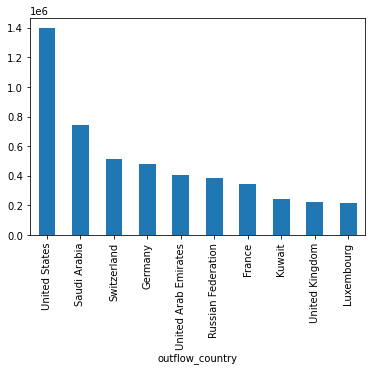

In [479]:
send_countries.total_rem.head(10).plot(kind='bar')

# Top SENDERS (0-15)

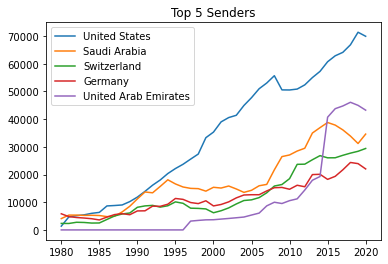

In [253]:
for i in range(5):
    senders.iloc[i].plot()
    plt.legend(loc='best')
    plt.title('Top 5 Senders')

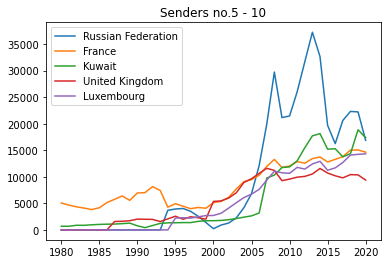

In [248]:
for i in range(5,10):
    senders.iloc[i].plot()
    plt.legend(loc='best')
    plt.title('Senders no.5 - 10')

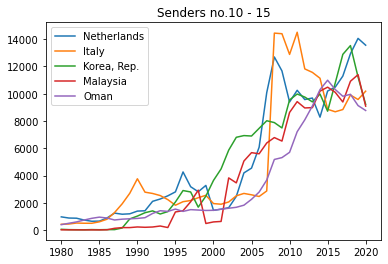

In [249]:
for i in range(10,15):
    senders.iloc[i].plot()
    plt.legend(loc='best')
    plt.title('Senders no.10 - 15')

In [12]:
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='b', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

<Figure size 432x288 with 0 Axes>

In [480]:
plt.close('all')

In [ ]:
# overlap between senders and receivers
# what are the top migrant groups in SEDING countries